In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
data = pd.read_csv("dataset_group.csv")

In [3]:
data.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [4]:
data.tail()

,Date,Order_id,Product
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent
20640,2020-02-26,1139,shampoo


In [5]:
#Check Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [6]:
data.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [7]:
#check Duplicates
data.duplicated().sum()

4730

In [8]:
data['Product'] = data['Product'].str.lower()

In [9]:
data

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose
...,...,...,...
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent


In [10]:
data.shape

(20641, 3)

In [11]:
data = data.drop(data[data.Product == 'none'].index)

In [12]:
data.shape

(20641, 3)

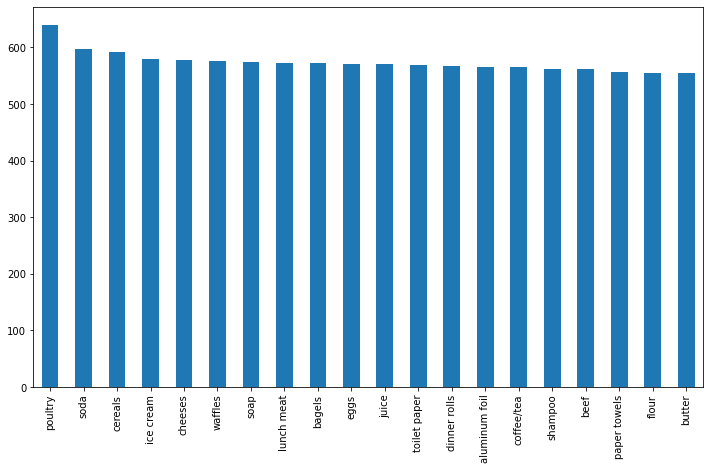

In [13]:
data['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

In [14]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [15]:
basket=data.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [16]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [17]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [18]:
basket=basket.applymap(encode_zero_one)

In [19]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(pork, soda, soap, sandwich bags, spaghetti sa..."
610568,0.011414,"(soda, waffles, soap, sandwich bags, spaghetti..."
610569,0.010536,"(soda, shampoo, laundry detergent, soap, lunch..."
610570,0.011414,"(yogurt, shampoo, milk, lunch meat, sandwich b..."


C:\Users\Rahul Pruthi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


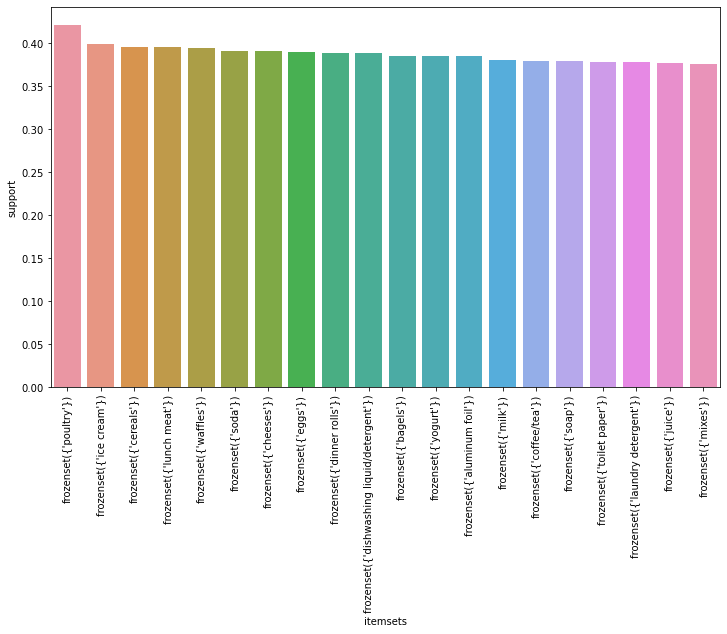

In [20]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()

# Check the rules using association_rules

In [ ]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [ ]:
basket.head(20)

# The End